# Data Preprocessing

Importing necessary libraries

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime
from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
%matplotlib inline
!pip install pmdarima --quiet
import pmdarima as pm

import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [4]:
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format = True)
data = data.rename(columns={'#Passengers': 'Passengers'})
data = data.set_index(['Month'])

data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
data.shape

(144, 1)

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


In [7]:
print(data.describe())

       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


In [8]:
# from matplotlib.pylab import rcParams
# plt.rcParams ['figure.figsize'] = (12, 5)
# plt.rcParams ['axes.grid'] = 'False'
# plt.rcParams ['font.size'] = 10
# plt.rcParams ['font.style'] = 'normal'

# Plotting the Airline timeseries plot

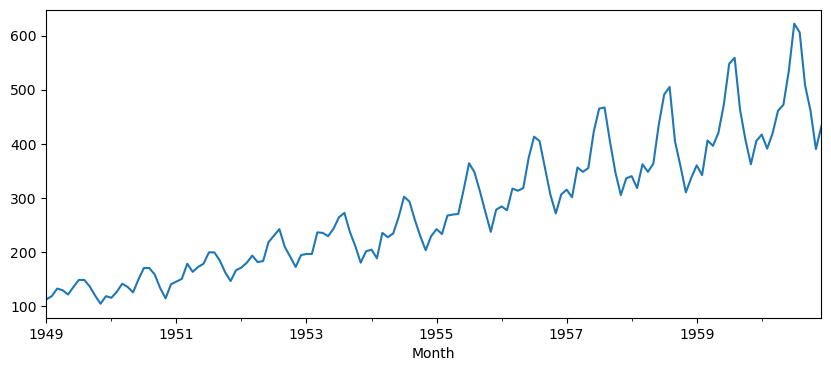

In [9]:
plt.figure(figsize = (10, 4))
data['Passengers'].plot();

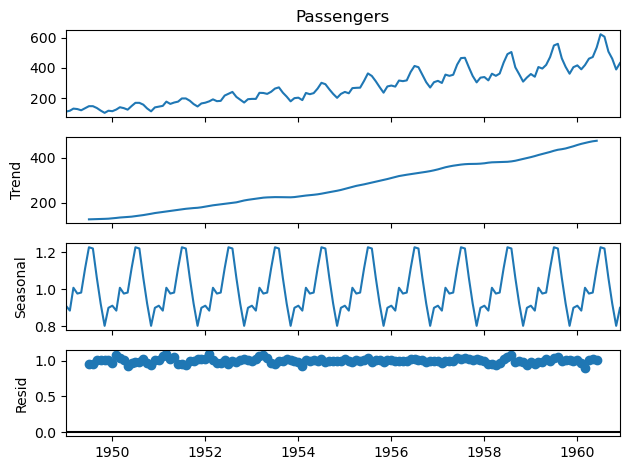

In [10]:
decomposition = sm.tsa.seasonal_decompose(data['Passengers'],
                                          period = 12,
                                          model = 'multiplicative').plot()
plt.show()

# **5 Ways To make the Data Stationary**

In [11]:
# 1) log transformation
# 2) subtracting simple moving average
# 3) subtractiong eponential moving average
# 4) subtracting from previous value (shift)
# 5) seasonal decomposition

**Stationarity Check using Augmented Dicky Fuller test Statistics and Calculation of Rolling Mean and Rolling Standard Deviation**

In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def check_stationarity(transformed_data, window_size=12, alpha=0.05):

    # Calculate moving statistics
    rolling_mean = transformed_data.rolling(window=window_size).mean()
    rolling_std = transformed_data.rolling(window=window_size).std()


    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(transformed_data, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    # Check the stationarity based on the p-value
    if dftest[1] < alpha:
        print('Reject the null hypothesis. The data is stationary.')
        print('------------------------------------------------------------')
        # return True
    else:
        print('Fail to reject the null hypothesis. The data is non-stationary.')
        print('-------------------------------------------------------------------')

    # Plot the moving statistics

    plt.figure(figsize=(10, 4))
    plt.plot(transformed_data, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean', color = 'red')
    plt.plot(rolling_std, label='Rolling Std', color = 'black')
    plt.legend()
    plt.title('Moving Statistics')
    plt.xlabel('Time')
    plt.ylabel('No of Passengers')
    plt.show()

    # return False


# 1) Log Transformatiom

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Fail to reject the null hypothesis. The data is non-stationary.
-------------------------------------------------------------------


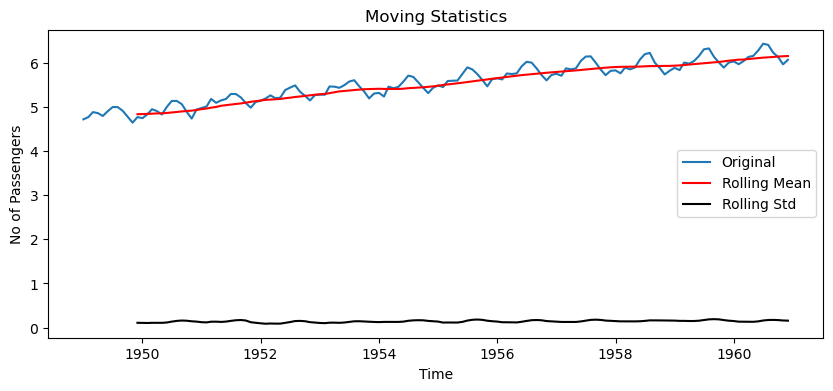

In [13]:
# Load the time series data into a pandas Series
data1 = data['Passengers']

# Apply log transformation to the data
log_data = np.log(data1)

# Perform stationarity check on the log-transformed data
check_stationarity(log_data)

# 2) Subtracting Simple Moving Average


In [14]:
# Finding moving average of the log tranformed dataset and then
# subtracting it from the log tranformed values
print('Value after subtracting the moving average from og scaled data')
print('---------------------------------------------------------------')
log_data_moving_avg = log_data.rolling(12).mean()
log_data_difference = log_data - log_data_moving_avg
print(log_data_difference)

Value after subtracting the moving average from og scaled data
---------------------------------------------------------------
Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: Passengers, Length: 144, dtype: float64


In [15]:
#Removing Nan or NULL values for performing ADF test.
log_data_difference.dropna(inplace = True)
print(log_data_difference)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: Passengers, Length: 133, dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64
Reject the null hypothesis. The data is stationary.
------------------------------------------------------------


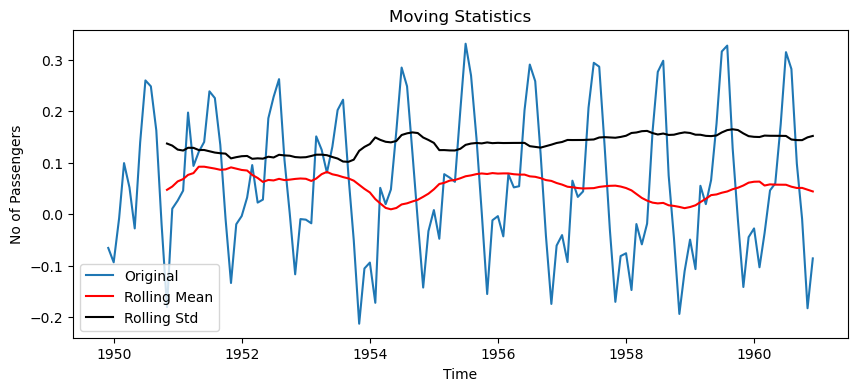

In [16]:
# Now performing stationarity check of the differenced log data.
check_stationarity(log_data_difference)

# 3) Differencing Exponential Moving Average

In [17]:
# Apply exponential moving average
log_data_ema = log_data.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
print('')
print('Exponential moving average values')
print('------------------------------------')
print(log_data_ema)


Exponential moving average values
------------------------------------
Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
                ...   
1960-08-01    6.046445
1960-09-01    6.056778
1960-10-01    6.061079
1960-11-01    6.055750
1960-12-01    6.056461
Name: Passengers, Length: 144, dtype: float64


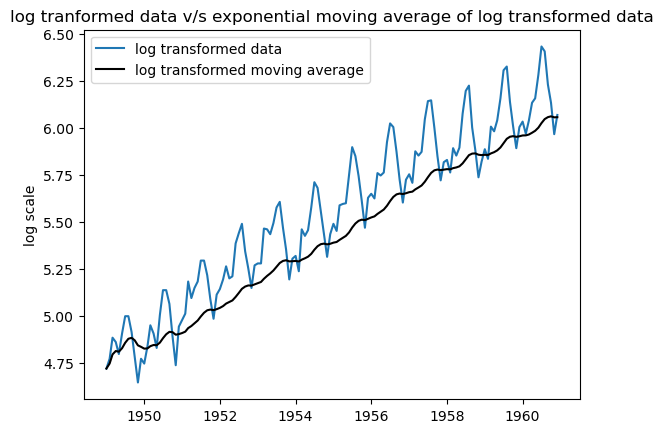

In [18]:
# log tranformed data v/s exponential moving average of log transformed data
plt.plot(log_data, label = 'log transformed data')
plt.plot(log_data_ema, color = 'black', label = 'log transformed moving average')
plt.ylabel('log scale')
plt.title('log tranformed data v/s exponential moving average of log transformed data')
plt.legend()
plt.show()

In [19]:
# Subtracting the expoential moving average from the log transformed values
log_data_ema_diff = log_data - log_data_ema
print('Differenced exponential moving average values')
print('------------------------------------------------')
print(log_data_ema_diff)

Differenced exponential moving average values
------------------------------------------------
Month
1949-01-01    0.000000
1949-02-01    0.025339
1949-03-01    0.088967
1949-04-01    0.048028
1949-05-01   -0.012415
                ...   
1960-08-01    0.360435
1960-09-01    0.173704
1960-10-01    0.072319
1960-11-01   -0.089603
1960-12-01    0.011964
Name: Passengers, Length: 144, dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Reject the null hypothesis. The data is stationary.
------------------------------------------------------------


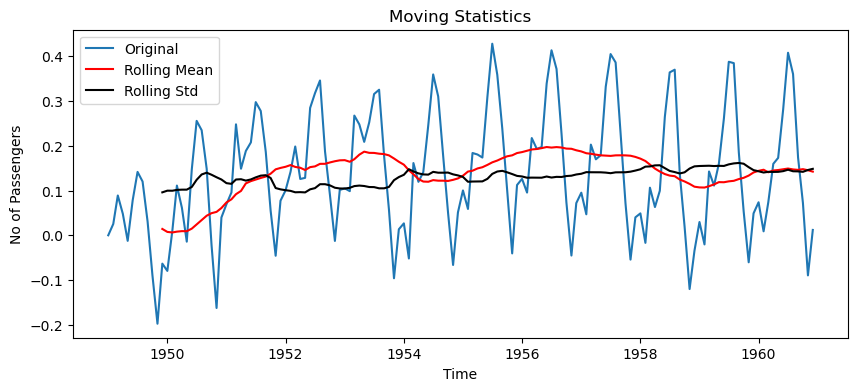

In [20]:
# Now performing stationarity check of the differenced exponential moving average.
check_stationarity(log_data_ema_diff)

# 4) Subtracting from previous value (shift)



In [21]:
#Subtractng the adjacent log scale values of the data
log_data_shift = log_data - log_data.shift()
log_data_shift.dropna(inplace = True)
print('')
print('Shifted log values')
print('-------------------')
print('')
print(log_data_shift)


Shifted log values
-------------------

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: Passengers, Length: 143, dtype: float64


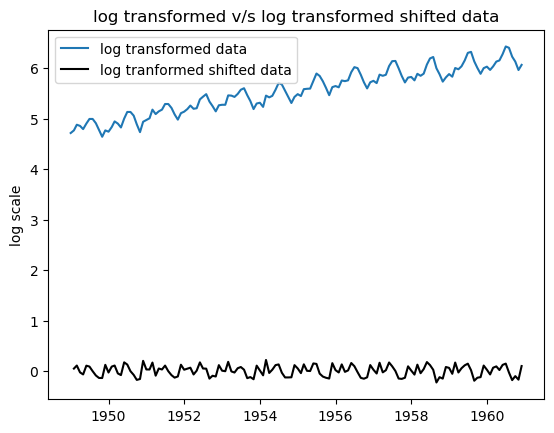

In [22]:
# Visualising shifted data

plt.plot(log_data, label = 'log transformed data')
plt.plot(log_data_shift, label = 'log tranformed shifted data', color = 'black')
plt.title('log transformed v/s log transformed shifted data')
plt.ylabel('log scale')
plt.legend()
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64
Fail to reject the null hypothesis. The data is non-stationary.
-------------------------------------------------------------------


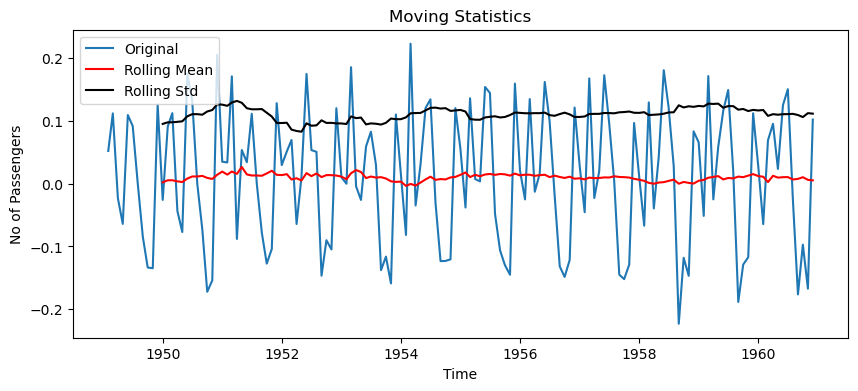

In [23]:
# Now performing stationarity check of the log transformed shifted data
check_stationarity(log_data_shift)

In [24]:
# Since the p value is sightly high from
# the threshold we can make the p value by shifting and subtracting previous 2 values.

log_data_shift2 = log_data - log_data.shift(2)
log_data_shift2.dropna(inplace = True)
print('')
print('Shifted log values')
print('-------------------')
print('')
print(log_data_shift2)


Shifted log values
-------------------

Month
1949-03-01    0.164303
1949-04-01    0.089128
1949-05-01   -0.087011
1949-06-01    0.045462
1949-07-01    0.201422
                ...   
1960-08-01    0.124613
1960-09-01   -0.202459
1960-10-01   -0.273482
1960-11-01   -0.264335
1960-12-01   -0.064972
Name: Passengers, Length: 142, dtype: float64


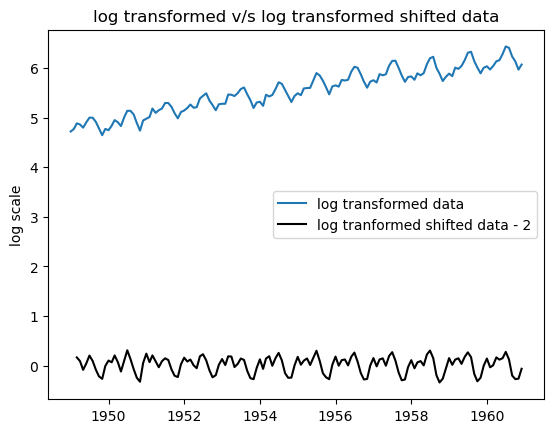

In [25]:
# Visualising shifted data

plt.plot(log_data, label = 'log transformed data')
plt.plot(log_data_shift2, label = 'log tranformed shifted data - 2', color = 'black')
plt.title('log transformed v/s log transformed shifted data')
plt.ylabel('log scale')
plt.legend()
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -3.167907
p-value                          0.021919
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Reject the null hypothesis. The data is stationary.
------------------------------------------------------------


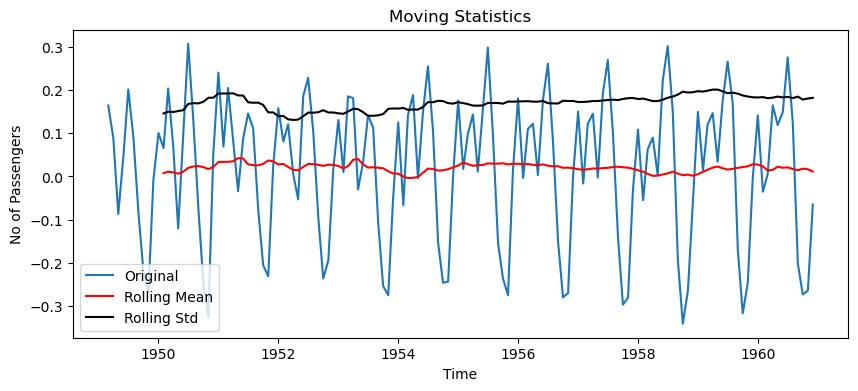

In [26]:
# Now performing stationarity check of the log transformed shifted data
check_stationarity(log_data_shift2)

# 5) Seasonal Decomposition

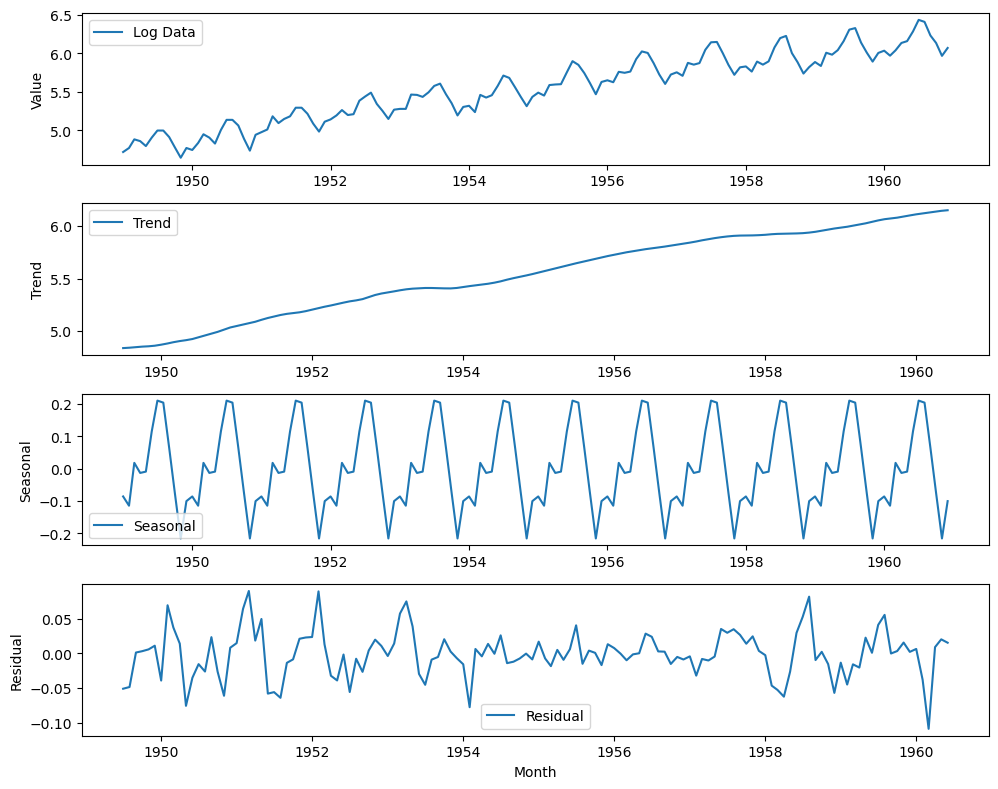

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply log transformation to the data
log_data = np.log(data['Passengers'])

# Decompose the log-transformed data
decomposition = seasonal_decompose(log_data, model='additive', period = 12)

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(log_data, label='Log Data')
plt.legend()
plt.ylabel('Value')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.ylabel('Residual')

plt.xlabel('Month')
plt.tight_layout()
plt.show()


Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64
Reject the null hypothesis. The data is stationary.
------------------------------------------------------------


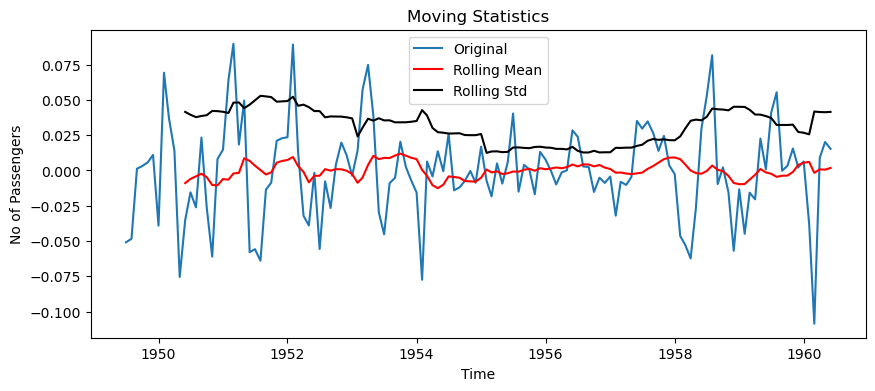

In [28]:
# Perform stationarity check on the seasonal decomposed data
log_data_decomposed = residual
log_data_decomposed.dropna(inplace = True)
check_stationarity(log_data_decomposed)

# Data Transformation from Non-Stationary to Stationary

Checking the stationarity of the Airline Passenger Data


---



Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Fail to reject the null hypothesis. The data is non-stationary.
-------------------------------------------------------------------


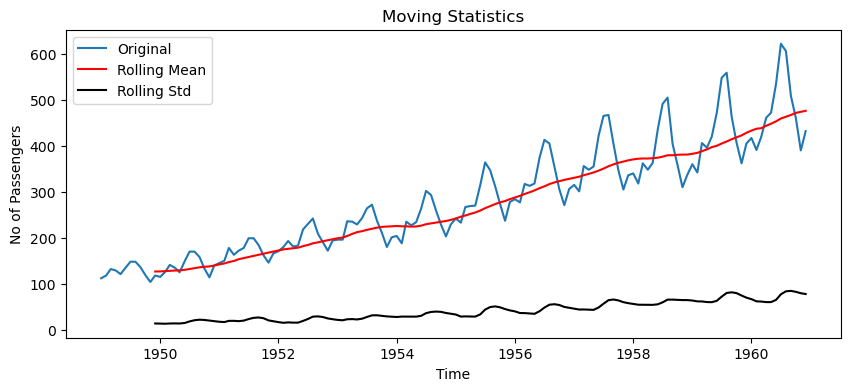

In [29]:
check_stationarity(data['Passengers'], window_size=12, alpha=0.05)

Subtractng the adjacent log scale values of the data

---




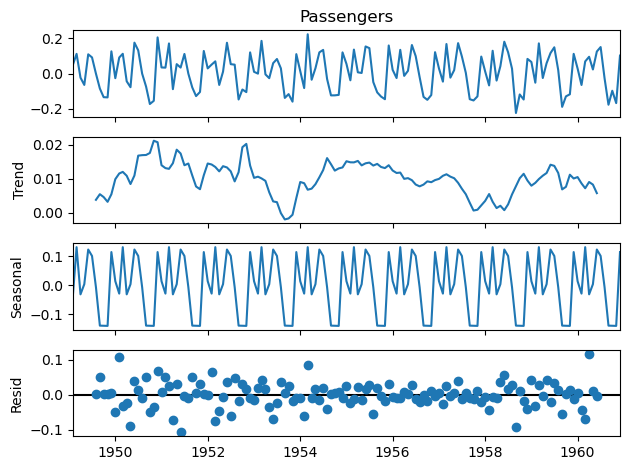

In [30]:
log_data = np.log(data['Passengers'])
log_data_shift = log_data.diff()
log_data_shift.dropna(inplace = True)

dec = sm.tsa.seasonal_decompose(log_data_shift ,period = 12).plot()
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64
Fail to reject the null hypothesis. The data is non-stationary.
-------------------------------------------------------------------


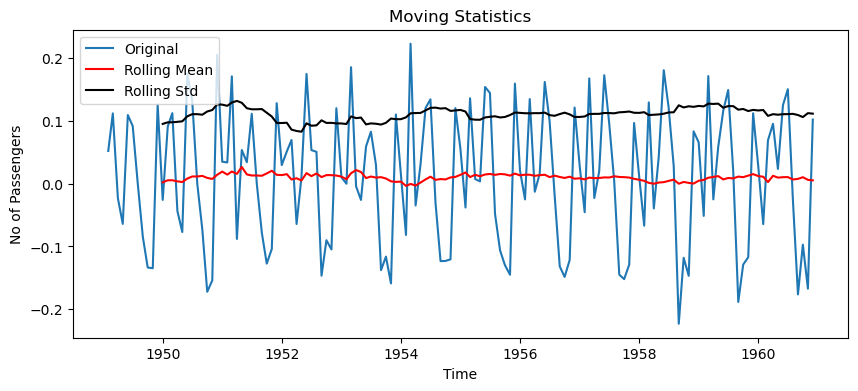

In [31]:
check_stationarity(log_data_shift, window_size=12, alpha=0.05)

**Subtracting the adjacent values of data before log transformation**

---



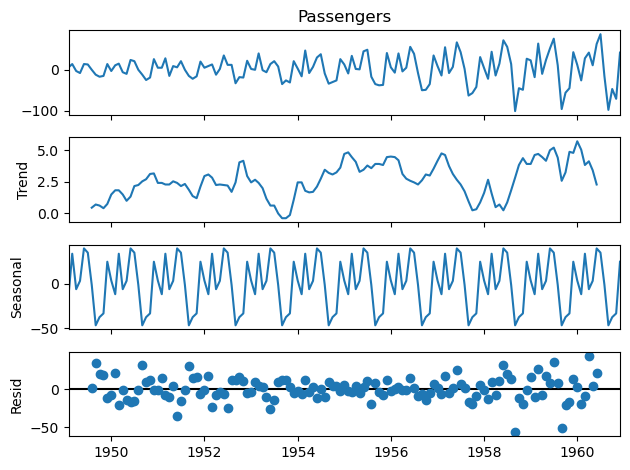

In [32]:
data_diff = data.diff()
data_diff = data_diff.dropna()

dec = sm.tsa.seasonal_decompose(data_diff['Passengers'],period = 12).plot()
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Fail to reject the null hypothesis. The data is non-stationary.
-------------------------------------------------------------------


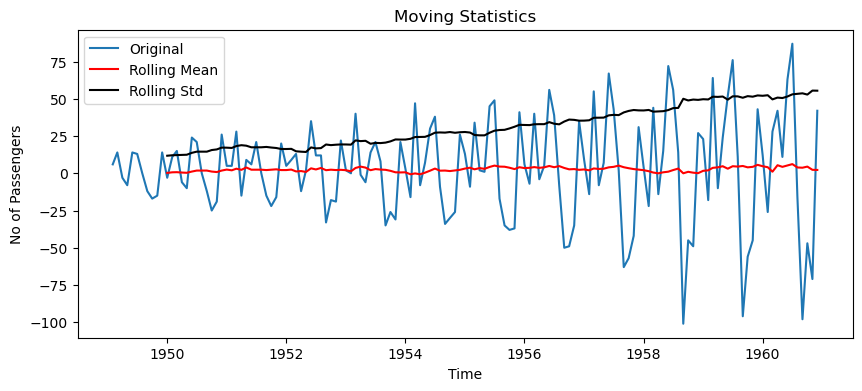

In [33]:
check_stationarity(data_diff['Passengers'], window_size=12, alpha=0.05)

# Plotting autocorrelation and Partial autocorrelation plots

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=(10,4))
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\nDickey-Fuller: p={0:.5f}'.format(p_value))
        sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
        sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()


Time Series analysis plots

---



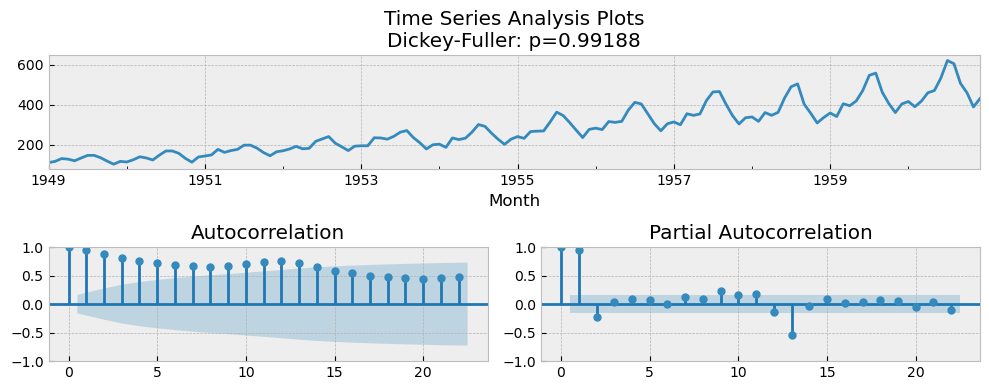

In [35]:
tsplot(data['Passengers'])

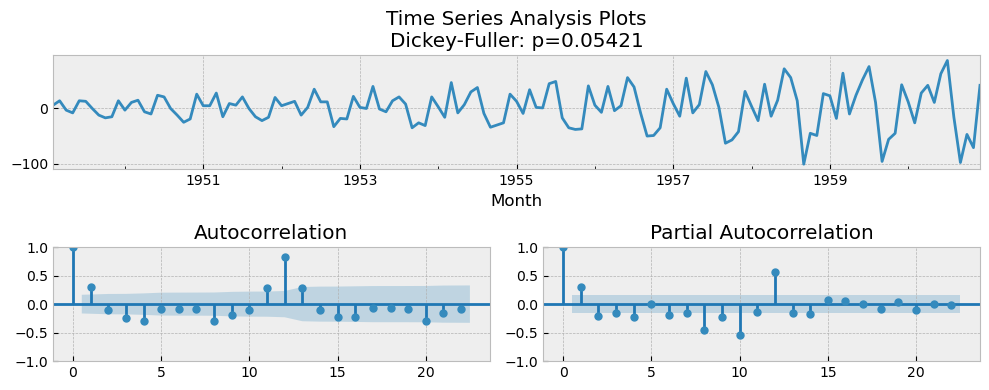

In [36]:
tsplot(data_diff['Passengers'])

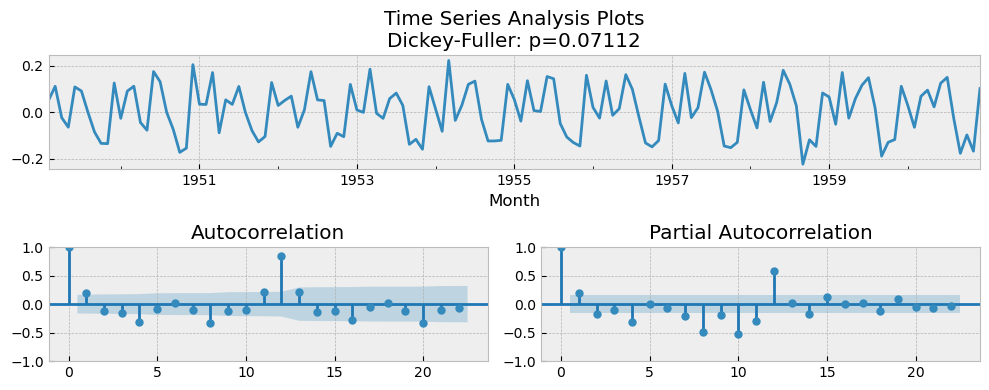

In [37]:
tsplot(log_data_shift)

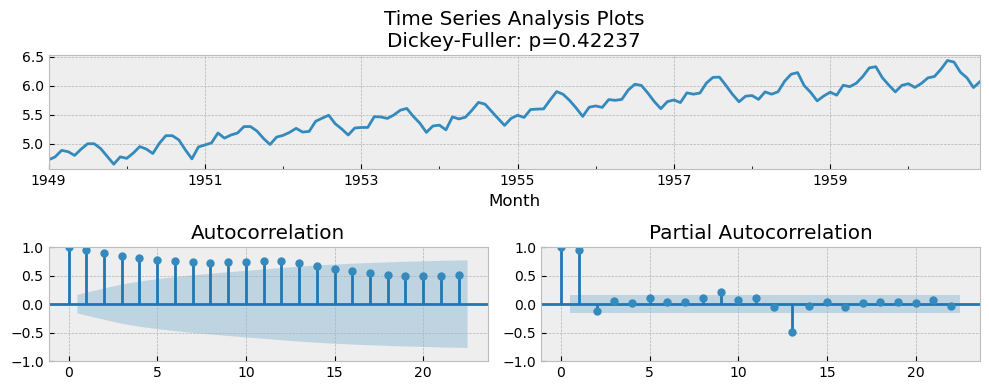

In [38]:
tsplot(log_data)

# **ARIMA**

---



# Finding the value of d parameter in ARIMA model

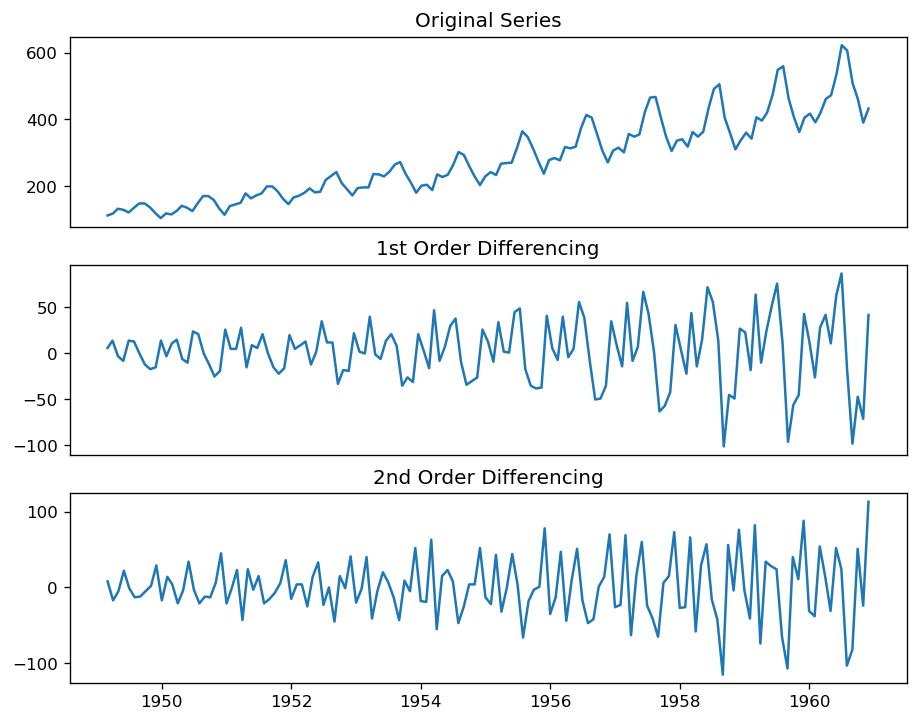

In [39]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data.Passengers); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data.Passengers.diff());
ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data.Passengers.diff().diff());
ax3.set_title('2nd Order Differencing')
plt.show()

 **Autocorrelation plots for Original, first order differencing and second order differencing plots**

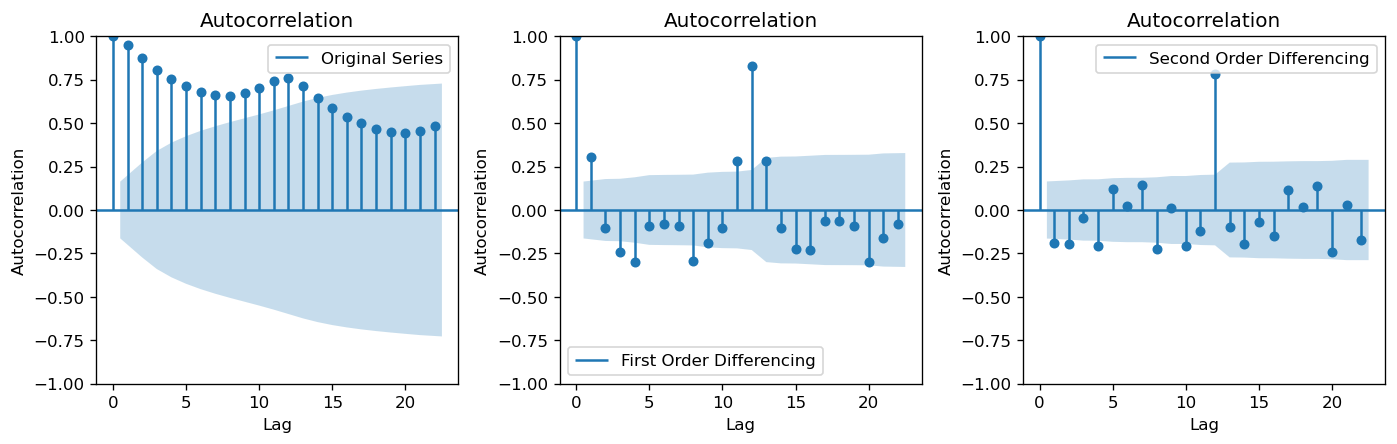

In [40]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.tight_layout(pad=3.0)

# Plot 1
axs[0].set_title('Autocorrelation (Original Series)')
plot_acf(data.Passengers, ax=axs[0])
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Autocorrelation')
axs[0].legend(['Original Series'])

# Plot 2
axs[1].set_title('Autocorrelation (First Order Differencing)')
plot_acf(data.Passengers.diff().dropna(), ax=axs[1])
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Autocorrelation')
axs[1].legend(['First Order Differencing'])

# Plot 3
axs[2].set_title('Autocorrelation (Second Order Differencing)')
plot_acf(data.Passengers.diff().diff().dropna(), ax=axs[2])
axs[2].set_xlabel('Lag')
axs[2].set_ylabel('Autocorrelation')
axs[2].legend(['Second Order Differencing'])

plt.show()


In [41]:
# Here we can see that in second-order differencing the immediate lag has gone
# on the negative side, representing that in the second-order the series
# has become over the difference.

# Finding the value of the parameter P

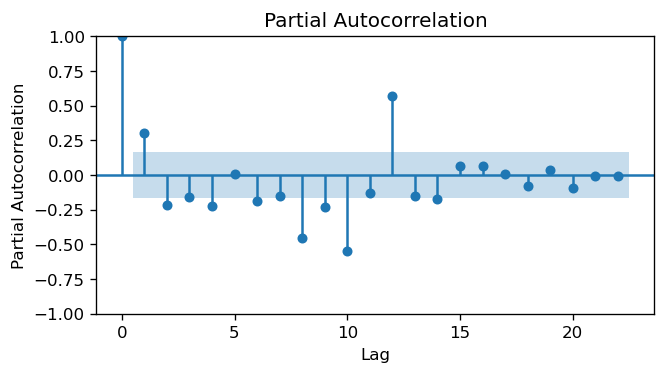

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(6, 3))

plot_pacf(data.Passengers.diff().dropna(), ax=ax)
ax.set_title('Partial Autocorrelation')
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')

plt.show()


In [43]:
# Here we can see that the first lag is significantly out of the limit
# and the second one is also out of the significant limit but it is not that far
# so we can select the order of the p as 1.

# Finding the value of the parameter q

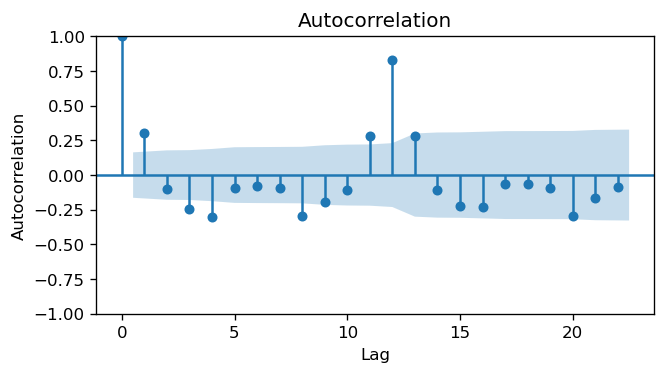

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(6, 3))

plot_acf(data.Passengers.diff().dropna(), ax=ax)
ax.set_title('Autocorrelation')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')

plt.show()

# Here we can see that 2 of the lags are out of the significance limit
# so we can say that the optimal value of our q (MA) is 2.

# Model Summary

In [45]:
model = ARIMA(data['Passengers'],order = (2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Sun, 29 Jun 2025   AIC                           1353.347
Time:                        18:24:09   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.831      0.0

# In-sample forcasting using ARIMA model

In [46]:
size = int(len(data) - 30)
train, test = data['Passengers'][0:size], data['Passengers'][size:len(data)]

print('\t ARIMA MODEL : In- Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):

    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (yhat, obs))

	 ARIMA MODEL : In- Sample Forecasting 

predicted = 435.368729, expected = 491.000000
predicted = 487.825559, expected = 505.000000
predicted = 484.761914, expected = 404.000000
predicted = 359.074739, expected = 359.000000
predicted = 380.902398, expected = 310.000000
predicted = 291.231477, expected = 337.000000
predicted = 336.938549, expected = 360.000000
predicted = 367.621040, expected = 342.000000
predicted = 360.295270, expected = 406.000000
predicted = 414.083702, expected = 396.000000
predicted = 378.520878, expected = 420.000000
predicted = 424.478083, expected = 472.000000
predicted = 459.477027, expected = 548.000000
predicted = 534.244222, expected = 559.000000
predicted = 523.511985, expected = 463.000000
predicted = 417.609257, expected = 407.000000
predicted = 366.683799, expected = 362.000000
predicted = 339.217686, expected = 405.000000
predicted = 411.312454, expected = 417.000000
predicted = 435.937921, expected = 391.000000
predicted = 418.796168, expected = 419.

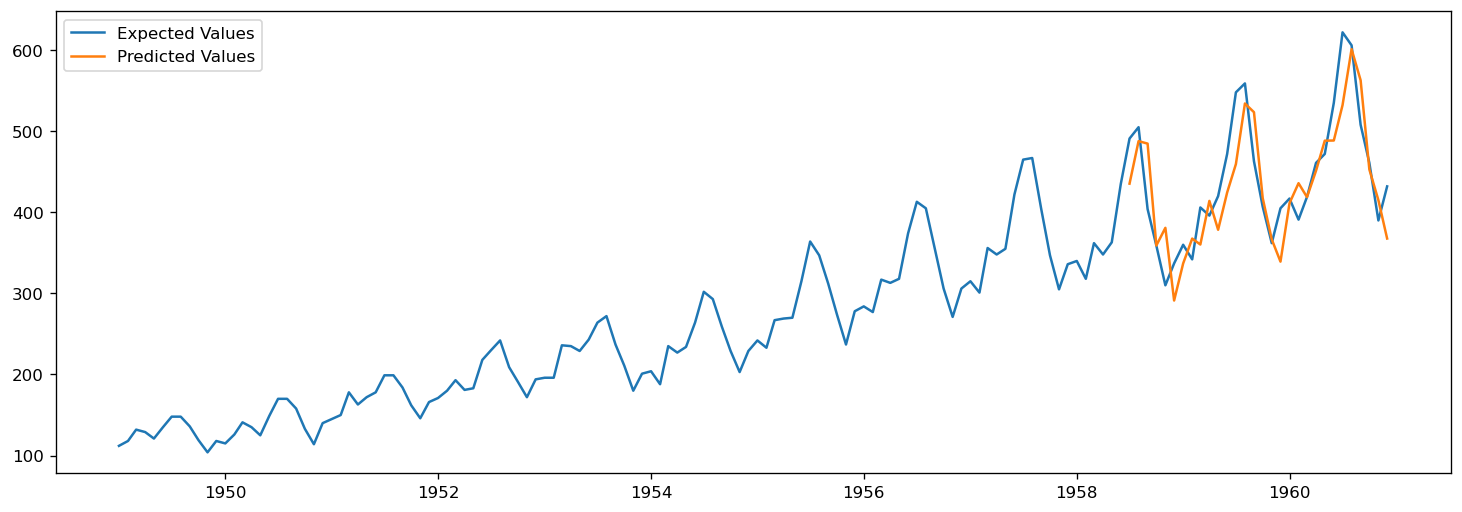

In [47]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data['Passengers'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [48]:
# Error
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 45.3445


# Out-of Sample Forecasting

In [50]:
!pip install pmdarima --quiet
import pmdarima as pm
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(data['Passengers'],
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

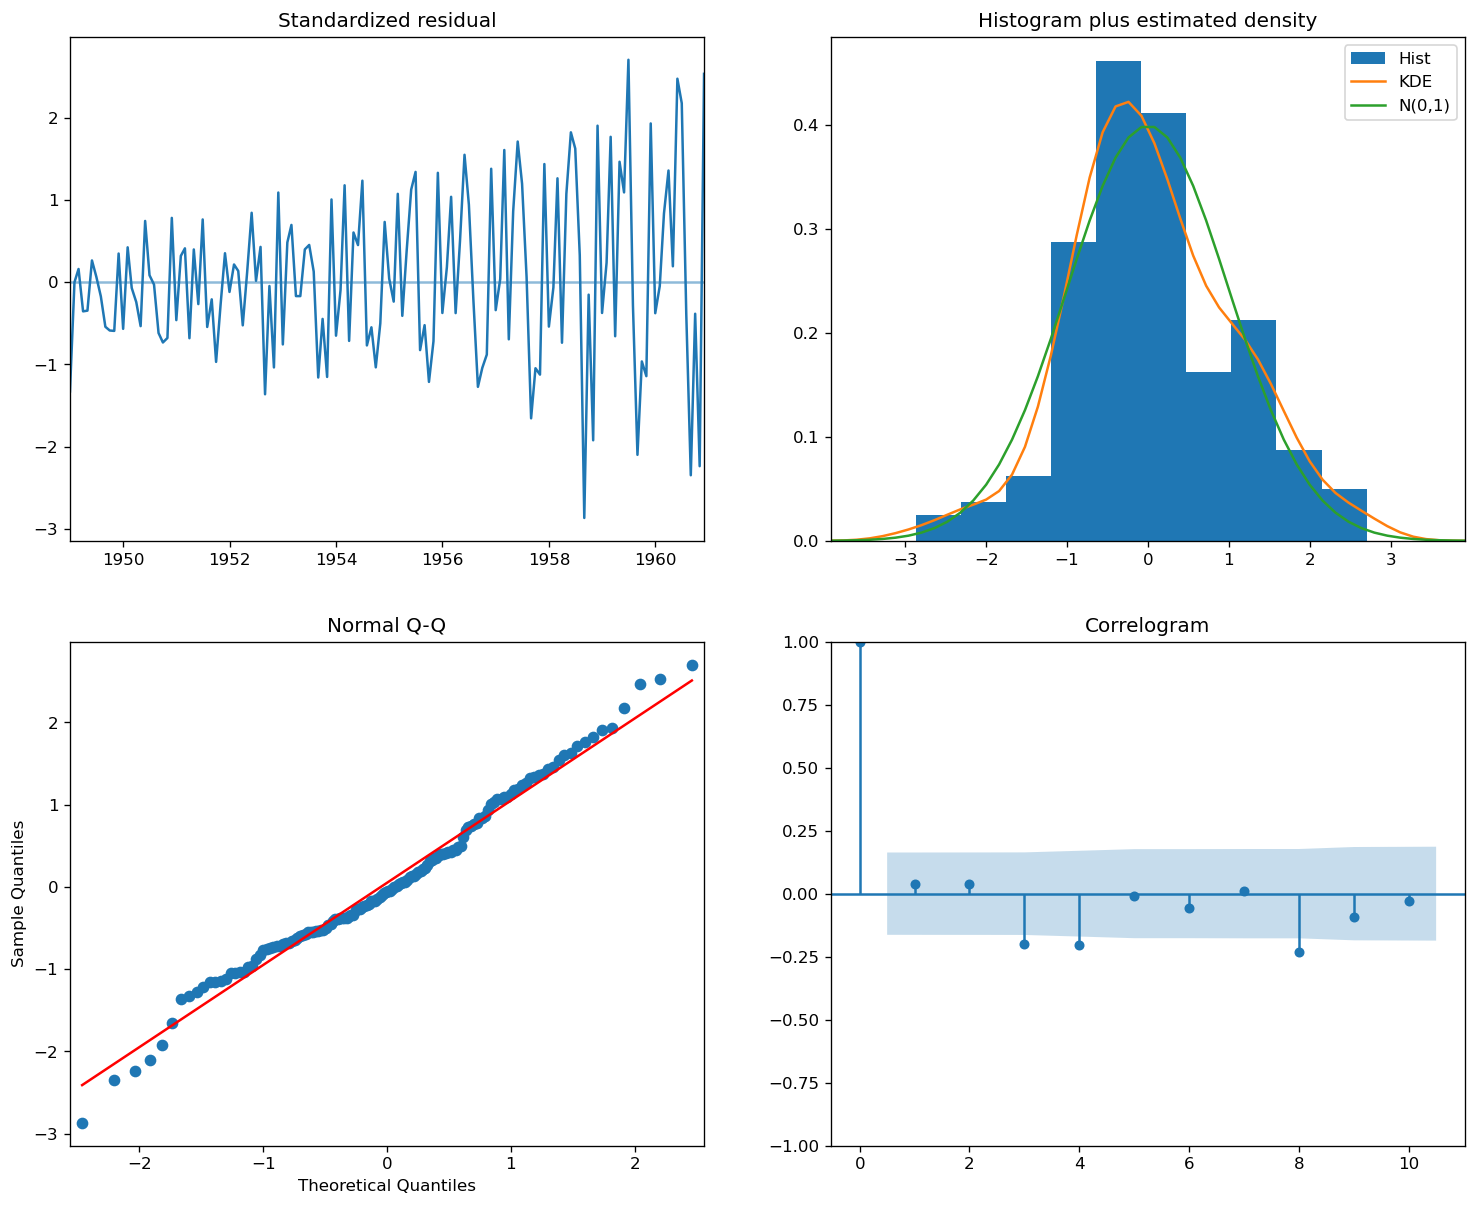

In [51]:

ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

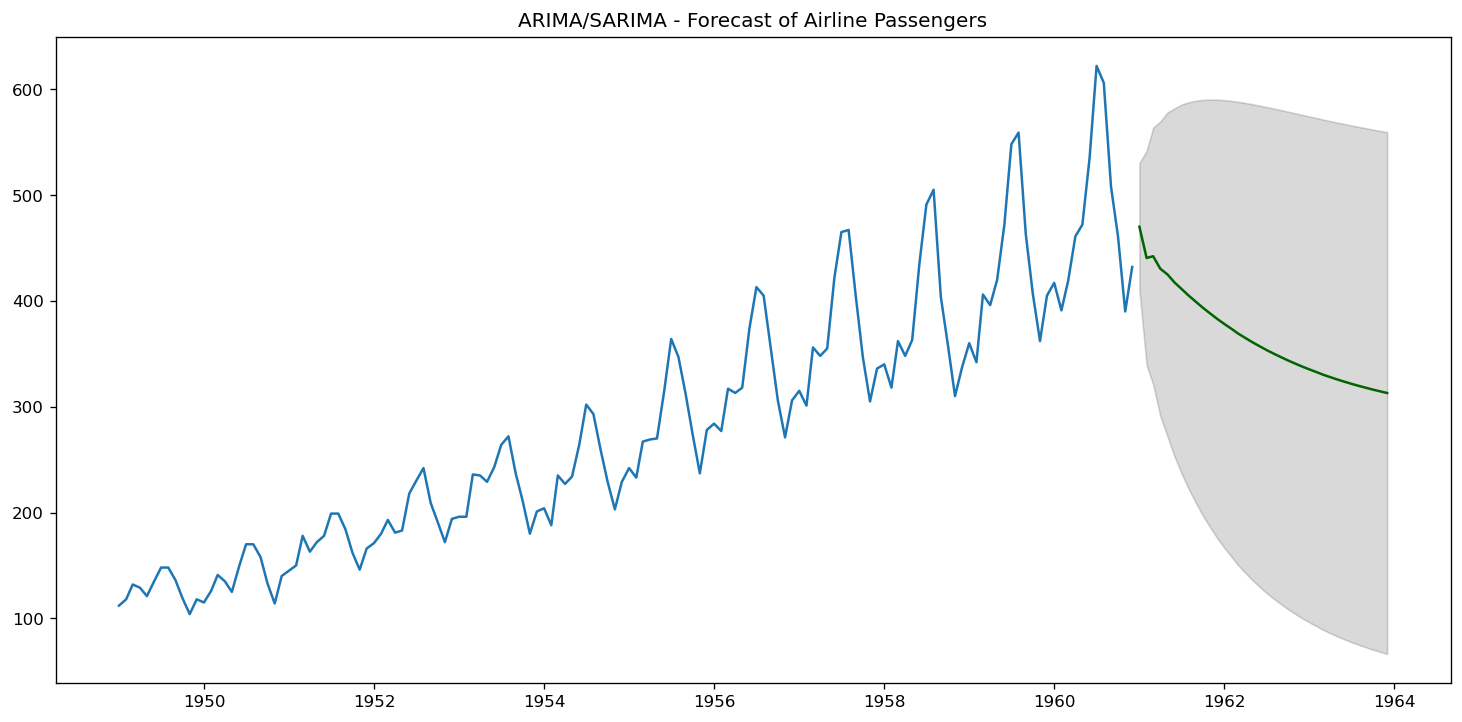

In [52]:
def forecast(ARIMA_model, periods=36):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(data["Passengers"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Airline Passengers")
    plt.show()

forecast(ARIMA_model)

# **SARIMA MODEL**

---



# Differencing the values of the differenced dataset with a lag of 12 and checking its statonarity

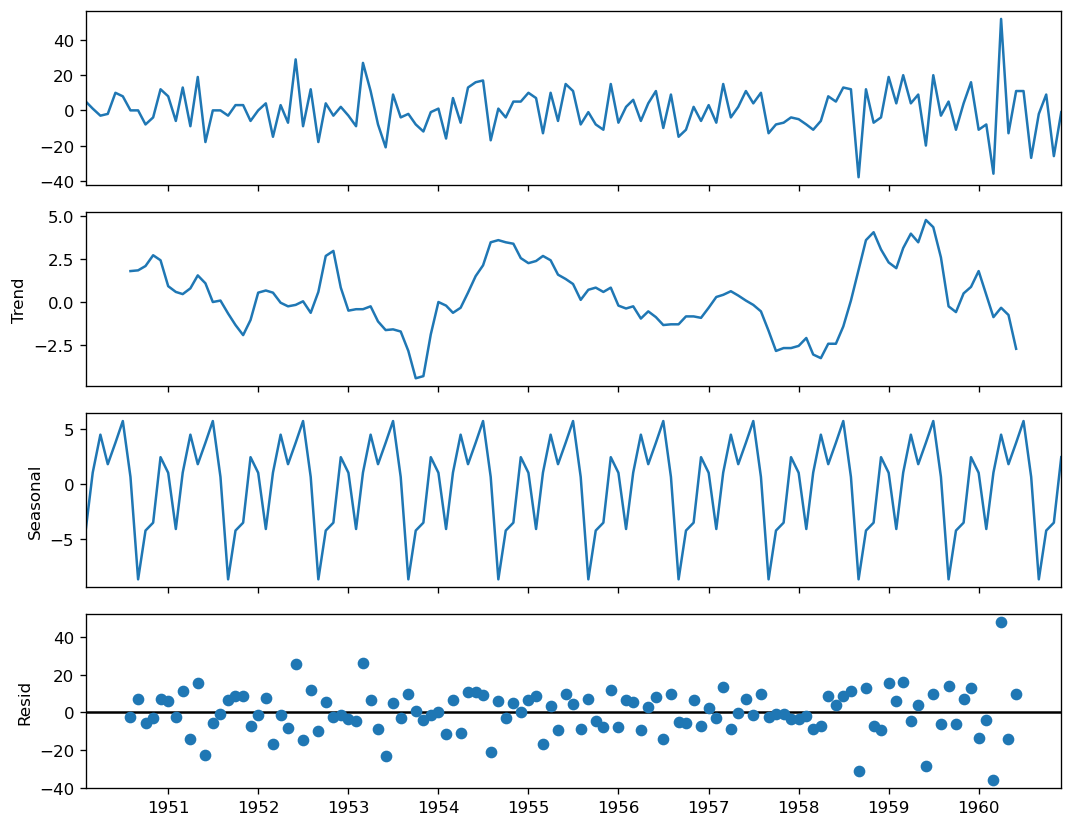

In [53]:
data_diff_seas = data_diff.diff(12)
data_diff_seas = data_diff_seas.dropna()
dec = sm.tsa.seasonal_decompose(data_diff_seas,period = 12)
dec.plot()
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.559562e+01
p-value                        1.856512e-28
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64
Reject the null hypothesis. The data is stationary.
------------------------------------------------------------


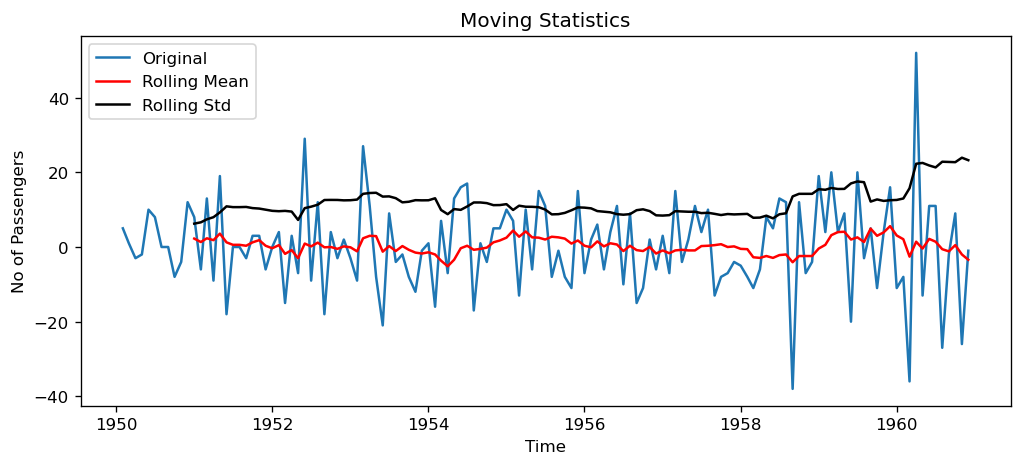

In [54]:
check_stationarity(data_diff_seas['Passengers'])

Partial autocorrelation and autocorrelation plots for the same

---



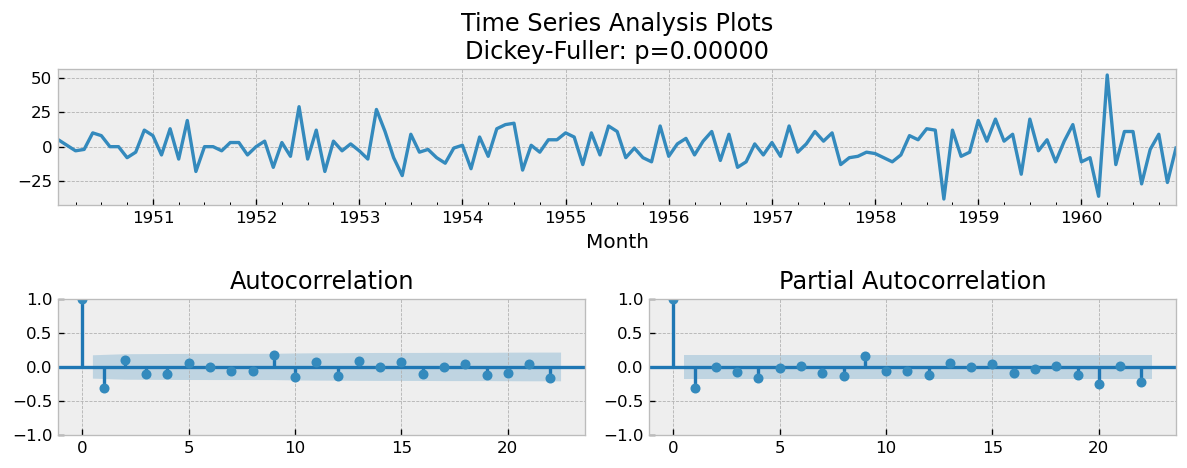

In [55]:
tsplot(data_diff_seas['Passengers'])

# Differencing the values of differenced log dataset with lag of 12 and checking its stationarity

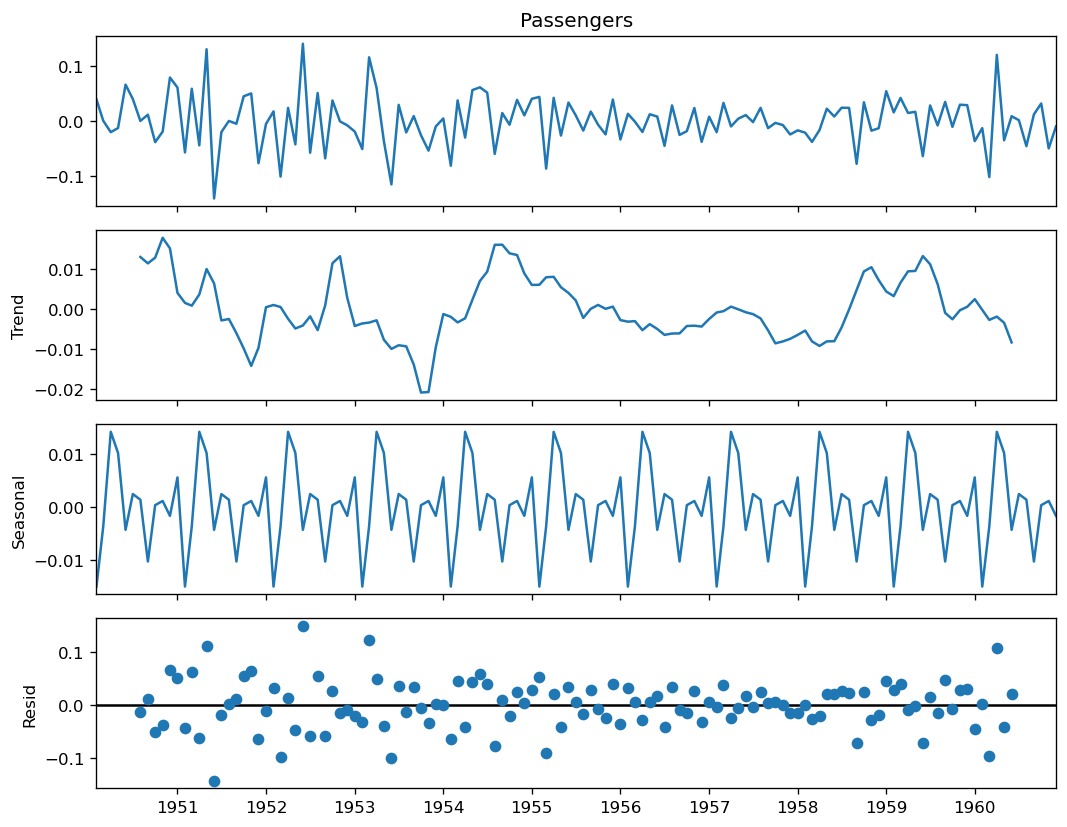

In [56]:
log_data_diff_seas = log_data_shift.diff(12)
log_data_diff_seas = log_data_diff_seas.dropna()
dec = sm.tsa.seasonal_decompose(log_data_diff_seas ,period = 12)
dec.plot()
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
Reject the null hypothesis. The data is stationary.
------------------------------------------------------------


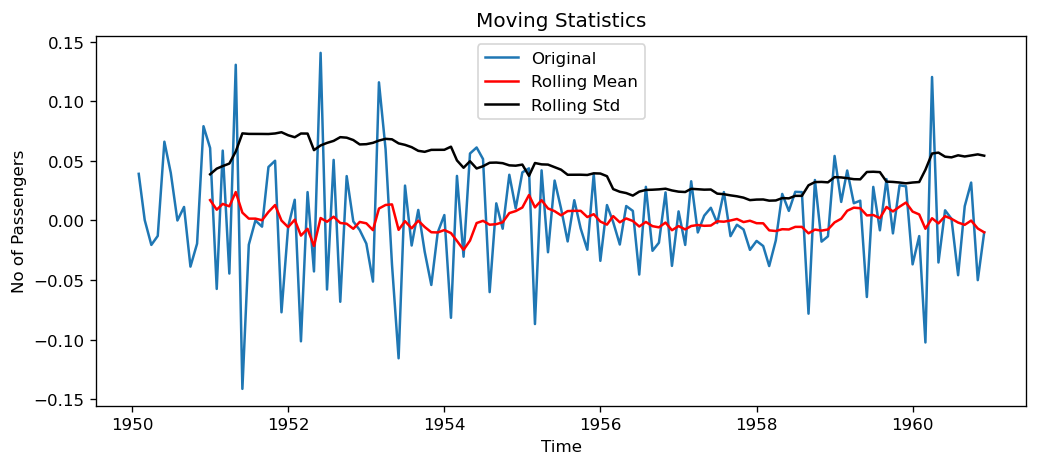

In [57]:
check_stationarity(log_data_diff_seas)

Partial autocorrelation and autocorrelation plots for the same


---



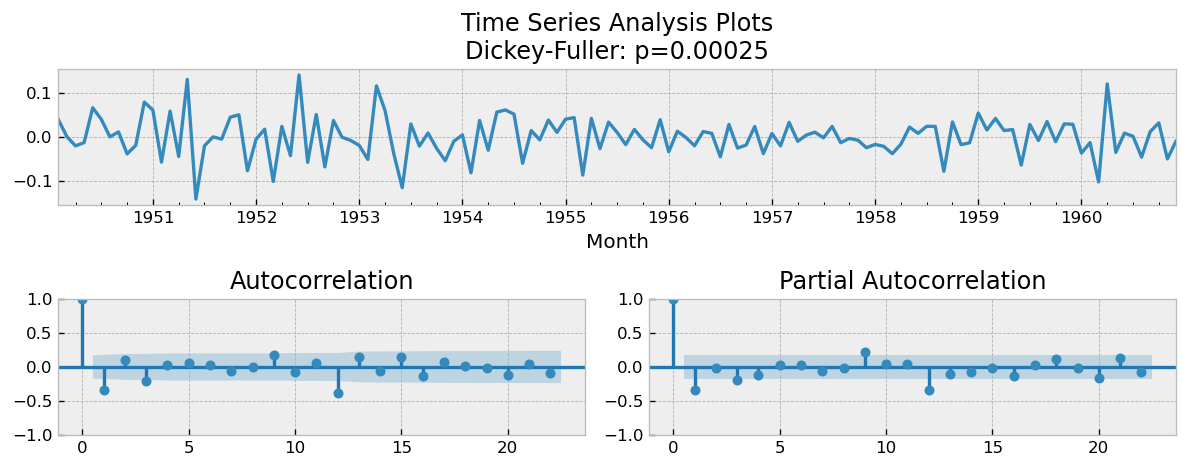

In [58]:
tsplot(log_data_diff_seas)

In [59]:
# For the SARIMA model, order of (p,d,q) will be same as the order of the ARIMA model above.
# For (P,D,Q,M) :
# P : 0
# D : 1
# Q : 1
# M : 12

# Model Summary

In [60]:
model = sm.tsa.statespace.SARIMAX(data['Passengers'],order = (2,1,2),seasonal_order = (0,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52286D+00    |proj g|=  8.40730D-02

At iterate    5    f=  3.51094D+00    |proj g|=  1.10231D-02

At iterate   10    f=  3.50236D+00    |proj g|=  2.04172D-02

At iterate   15    f=  3.50094D+00    |proj g|=  7.95686D-03

At iterate   20    f=  3.49979D+00    |proj g|=  1.10264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   2.602D-05   3.500D+00
  F =   3.4997746156044105     

CONVERG

# In-Sample Forecasting

In [61]:
size = int(len(data) - 30)
train, test = data['Passengers'][0:size], data['Passengers'][size:len(data)]

print('\t SARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):

    model = sm.tsa.statespace.SARIMAX(history,order = (2,1,2),seasonal_order = (0,1,1,12))
    model_fit = model.fit()

    output = model_fit.forecast()

    yhat = output[0]
    predictions.append(float(yhat))

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (yhat, obs))

	 SARIMA MODEL : In - Sample Forecasting 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24773D+00    |proj g|=  3.85280D-02

At iterate    5    f=  3.24330D+00    |proj g|=  3.92157D-02

At iterate   10    f=  3.23721D+00    |proj g|=  1.66594D-02


 This problem is unconstrained.



At iterate   15    f=  3.22917D+00    |proj g|=  4.75928D-03

At iterate   20    f=  3.22880D+00    |proj g|=  1.37446D-03

At iterate   25    f=  3.22866D+00    |proj g|=  3.95146D-04

At iterate   30    f=  3.22865D+00    |proj g|=  1.69603D-04

At iterate   35    f=  3.22864D+00    |proj g|=  3.39559D-05

At iterate   40    f=  3.22864D+00    |proj g|=  1.69853D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     45      1     0     0   3.199D-05   3.229D+00
  F =   3.2286437942646504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 479.085284, expected = 491.000000
RUNNI

 This problem is unconstrained.



At iterate   15    f=  3.23498D+00    |proj g|=  6.62059D-03

At iterate   20    f=  3.23476D+00    |proj g|=  5.43467D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   4.493D-06   3.235D+00
  F =   3.2347276386667239     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 490.553509, expected = 505.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26728D+00    |proj g|=  3.67042D-02

At iterate    5    f=  

 This problem is unconstrained.



At iterate   10    f=  3.25422D+00    |proj g|=  1.27227D-02

At iterate   15    f=  3.24525D+00    |proj g|=  2.70681D-02

At iterate   20    f=  3.24404D+00    |proj g|=  1.79272D-03

At iterate   25    f=  3.24403D+00    |proj g|=  6.74851D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   6.749D-06   3.244D+00
  F =   3.2440327648833640     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 441.276125, expected = 404.000000


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32415D+00    |proj g|=  6.28143D-02

At iterate    5    f=  3.31370D+00    |proj g|=  2.79656D-02

At iterate   10    f=  3.31000D+00    |proj g|=  1.18133D-02

At iterate   15    f=  3.30761D+00    |proj g|=  3.88525D-03

At iterate   20    f=  3.30582D+00    |proj g|=  9.57809D-04

At iterate   25    f=  3.30573D+00    |proj g|=  6.14050D-04

At iterate   30    f=  3.30569D+00    |proj g|=  9.22546D-04

At iterate   35    f=  3.30568D+00    |proj g|=  3.19581D-04

At iterate   40    f=  3.30568D+00    |proj g|=  1.34403D-04

At iterate   45    f=  3.30568D+00    |proj g|=  6.93481D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  3.31336D+00    |proj g|=  2.65423D-02

At iterate   10    f=  3.30939D+00    |proj g|=  1.00603D-02

At iterate   15    f=  3.30645D+00    |proj g|=  2.42365D-02

At iterate   20    f=  3.30511D+00    |proj g|=  1.19751D-03

At iterate   25    f=  3.30499D+00    |proj g|=  2.67914D-04

At iterate   30    f=  3.30498D+00    |proj g|=  8.97210D-05

At iterate   35    f=  3.30497D+00    |proj g|=  1.66461D-04

At iterate   40    f=  3.30497D+00    |proj g|=  3.01789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     53      1     0     0   3.648D-05   3.305D+00
  F =   3.30497371561

 This problem is unconstrained.



At iterate   20    f=  3.30545D+00    |proj g|=  1.17640D-03

At iterate   25    f=  3.30526D+00    |proj g|=  2.46767D-04

At iterate   30    f=  3.30523D+00    |proj g|=  6.15047D-04

At iterate   35    f=  3.30523D+00    |proj g|=  2.35603D-04

At iterate   40    f=  3.30523D+00    |proj g|=  2.36092D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     52      1     0     0   7.177D-05   3.305D+00
  F =   3.3052293027954134     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 347.833107, expected = 337.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate   15    f=  3.31311D+00    |proj g|=  4.06487D-03

At iterate   20    f=  3.30985D+00    |proj g|=  1.38417D-02

At iterate   25    f=  3.30945D+00    |proj g|=  2.61614D-03

At iterate   30    f=  3.30919D+00    |proj g|=  1.40734D-03

At iterate   35    f=  3.30915D+00    |proj g|=  1.46874D-03

At iterate   40    f=  3.30914D+00    |proj g|=  4.79418D-04

At iterate   45    f=  3.30914D+00    |proj g|=  1.38100D-04

At iterate   50    f=  3.30914D+00    |proj g|=  4.69758D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     53      1     0     0   4.698D-05   3.309D+00
  F =   3.30914026444

 This problem is unconstrained.



At iterate   10    f=  3.32473D+00    |proj g|=  1.45493D-02

At iterate   15    f=  3.32200D+00    |proj g|=  5.19985D-03

At iterate   20    f=  3.31852D+00    |proj g|=  3.13879D-03

At iterate   25    f=  3.31839D+00    |proj g|=  2.94380D-03

At iterate   30    f=  3.31829D+00    |proj g|=  5.94610D-04

At iterate   35    f=  3.31827D+00    |proj g|=  9.38636D-05

At iterate   40    f=  3.31827D+00    |proj g|=  9.60253D-05

At iterate   45    f=  3.31827D+00    |proj g|=  8.26925D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     55      1     0     0   8.751D-06   3.318D+00
  F =   3.31827289715

 This problem is unconstrained.



At iterate   20    f=  3.31871D+00    |proj g|=  1.57392D-03

At iterate   25    f=  3.31847D+00    |proj g|=  1.49618D-03

At iterate   30    f=  3.31844D+00    |proj g|=  3.30431D-04

At iterate   35    f=  3.31843D+00    |proj g|=  7.33120D-05

At iterate   40    f=  3.31843D+00    |proj g|=  9.57061D-05

At iterate   45    f=  3.31843D+00    |proj g|=  2.89281D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     52      1     0     0   9.255D-05   3.318D+00
  F =   3.3184275986765122     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 387.591418, expected = 406.000000
RUNNI

 This problem is unconstrained.



At iterate   15    f=  3.33266D+00    |proj g|=  8.60905D-03

At iterate   20    f=  3.33136D+00    |proj g|=  4.13702D-03

At iterate   25    f=  3.33130D+00    |proj g|=  2.04723D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     36      1     0     0   2.378D-05   3.331D+00
  F =   3.3313041075542884     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 387.333486, expected = 396.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  3.34487D+00    |proj g|=  2.28446D-02

At iterate   10    f=  3.34258D+00    |proj g|=  9.77844D-03

At iterate   15    f=  3.33359D+00    |proj g|=  1.37306D-02

At iterate   20    f=  3.33333D+00    |proj g|=  7.01925D-04

At iterate   25    f=  3.33329D+00    |proj g|=  4.95350D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     36      1     0     0   1.572D-06   3.333D+00
  F =   3.3332856211930304     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 408.192790, expected = 420.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate   15    f=  3.34186D+00    |proj g|=  1.75661D-02

At iterate   20    f=  3.33791D+00    |proj g|=  4.15478D-03

At iterate   25    f=  3.33786D+00    |proj g|=  2.73648D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   2.949D-05   3.338D+00
  F =   3.3378496274098528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 485.988940, expected = 472.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  3.35516D+00    |proj g|=  3.87554D-02

At iterate   10    f=  3.34812D+00    |proj g|=  1.56471D-02

At iterate   15    f=  3.34559D+00    |proj g|=  5.86434D-03

At iterate   20    f=  3.34446D+00    |proj g|=  1.64756D-03

At iterate   25    f=  3.34443D+00    |proj g|=  1.56415D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   1.059D-05   3.344D+00
  F =   3.3444305559143461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 529.031343, expected = 548.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate   10    f=  3.35901D+00    |proj g|=  2.45576D-02

At iterate   15    f=  3.35728D+00    |proj g|=  3.39659D-03

At iterate   20    f=  3.35671D+00    |proj g|=  2.87672D-03

At iterate   25    f=  3.35669D+00    |proj g|=  2.99063D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   2.991D-06   3.357D+00
  F =   3.3566898480250797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 551.914005, expected = 559.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate   25    f=  3.35750D+00    |proj g|=  3.28650D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     33      1     0     0   1.696D-05   3.357D+00
  F =   3.3574963947850822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 459.061268, expected = 463.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.37893D+00    |proj g|=  6.19286D-02

At iterate    5    f=  3.37206D+00    |proj g|=  2.90376D-02

At iterate   10    f=  

 This problem is unconstrained.



At iterate   15    f=  3.35788D+00    |proj g|=  9.04210D-03

At iterate   20    f=  3.35702D+00    |proj g|=  8.24869D-04

At iterate   25    f=  3.35702D+00    |proj g|=  1.32714D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   1.327D-05   3.357D+00
  F =   3.3570171481341444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 411.970101, expected = 407.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  3.36953D+00    |proj g|=  1.79595D-02

At iterate   10    f=  3.36120D+00    |proj g|=  6.63900D-03

At iterate   15    f=  3.35771D+00    |proj g|=  4.77253D-03

At iterate   20    f=  3.35691D+00    |proj g|=  1.41175D-04

At iterate   25    f=  3.35691D+00    |proj g|=  8.68967D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   8.690D-06   3.357D+00
  F =   3.3569112308648008     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 358.421156, expected = 362.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate   15    f=  3.35679D+00    |proj g|=  4.01118D-03

At iterate   20    f=  3.35636D+00    |proj g|=  3.78258D-04

At iterate   25    f=  3.35636D+00    |proj g|=  1.22076D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     33      1     0     0   1.902D-05   3.356D+00
  F =   3.3563620495182231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 384.945715, expected = 405.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate   15    f=  3.37025D+00    |proj g|=  3.49034D-03

At iterate   20    f=  3.36988D+00    |proj g|=  2.10341D-04

At iterate   25    f=  3.36988D+00    |proj g|=  7.76339D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     28      1     0     0   7.763D-06   3.370D+00
  F =   3.3698783395449130     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 420.143764, expected = 417.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  3.38126D+00    |proj g|=  2.48732D-02

At iterate   10    f=  3.37407D+00    |proj g|=  2.68670D-02

At iterate   15    f=  3.37052D+00    |proj g|=  5.76028D-03

At iterate   20    f=  3.36922D+00    |proj g|=  1.09136D-03

At iterate   25    f=  3.36918D+00    |proj g|=  4.13729D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   5.896D-07   3.369D+00
  F =   3.3691815270909373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 397.755393, expected = 391.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate   10    f=  3.37350D+00    |proj g|=  2.29642D-02

At iterate   15    f=  3.37068D+00    |proj g|=  7.57882D-03

At iterate   20    f=  3.36974D+00    |proj g|=  5.98590D-04

At iterate   25    f=  3.36973D+00    |proj g|=  7.90790D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   7.908D-06   3.370D+00
  F =   3.3697345216265591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 451.335481, expected = 419.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate   20    f=  3.40504D+00    |proj g|=  4.20709D-03

At iterate   25    f=  3.40439D+00    |proj g|=  1.87644D-04

At iterate   30    f=  3.40439D+00    |proj g|=  5.38596D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     37      1     0     0   9.307D-06   3.404D+00
  F =   3.4043861162963713     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 415.675346, expected = 461.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  3.47356D+00    |proj g|=  1.71934D-02

At iterate   10    f=  3.46688D+00    |proj g|=  3.90512D-02

At iterate   15    f=  3.46463D+00    |proj g|=  3.74451D-03

At iterate   20    f=  3.46406D+00    |proj g|=  1.30271D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   1.506D-05   3.464D+00
  F =   3.4640638751400550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 465.295933, expected = 472.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate   20    f=  3.46415D+00    |proj g|=  1.67245D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   8.912D-06   3.464D+00
  F =   3.4641405592336167     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 529.835406, expected = 535.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47964D+00    |proj g|=  5.51144D-02

At iterate    5    f=  3.47203D+00    |proj g|=  1.21894D-02


 This problem is unconstrained.



At iterate   10    f=  3.46595D+00    |proj g|=  1.33697D-02

At iterate   15    f=  3.46422D+00    |proj g|=  4.93944D-03

At iterate   20    f=  3.46380D+00    |proj g|=  6.01710D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   2.767D-05   3.464D+00
  F =   3.4638023148189774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 599.299658, expected = 622.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  3.48365D+00    |proj g|=  1.57245D-02

At iterate   10    f=  3.47863D+00    |proj g|=  1.73290D-02

At iterate   15    f=  3.47654D+00    |proj g|=  4.94507D-03

At iterate   20    f=  3.47641D+00    |proj g|=  1.31822D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   2.553D-06   3.476D+00
  F =   3.4764101577432989     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 626.292200, expected = 606.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate    5    f=  3.49846D+00    |proj g|=  2.62277D-02

At iterate   10    f=  3.48954D+00    |proj g|=  2.51729D-02

At iterate   15    f=  3.48695D+00    |proj g|=  4.18027D-03

At iterate   20    f=  3.48626D+00    |proj g|=  1.68719D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   8.584D-06   3.486D+00
  F =   3.4862628343312534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 513.891979, expected = 508.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         

 This problem is unconstrained.



At iterate   15    f=  3.48744D+00    |proj g|=  6.40157D-03

At iterate   20    f=  3.48612D+00    |proj g|=  5.86559D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   7.692D-06   3.486D+00
  F =   3.4861150419166407     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 450.136744, expected = 461.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50555D+00    |proj g|=  7.21303D-02


 This problem is unconstrained.



At iterate    5    f=  3.49628D+00    |proj g|=  8.29443D-03

At iterate   10    f=  3.49197D+00    |proj g|=  3.33286D-02

At iterate   15    f=  3.49020D+00    |proj g|=  1.64008D-02

At iterate   20    f=  3.48826D+00    |proj g|=  1.66619D-03

At iterate   25    f=  3.48825D+00    |proj g|=  6.68614D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   1.462D-05   3.488D+00
  F =   3.4882496928002178     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted = 411.653932, expected = 390.000000
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.

 This problem is unconstrained.



At iterate   15    f=  3.50076D+00    |proj g|=  1.13975D-02

At iterate   20    f=  3.49983D+00    |proj g|=  3.53580D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   7.885D-06   3.500D+00
  F =   3.4998205353482987     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted = 438.411436, expected = 432.000000


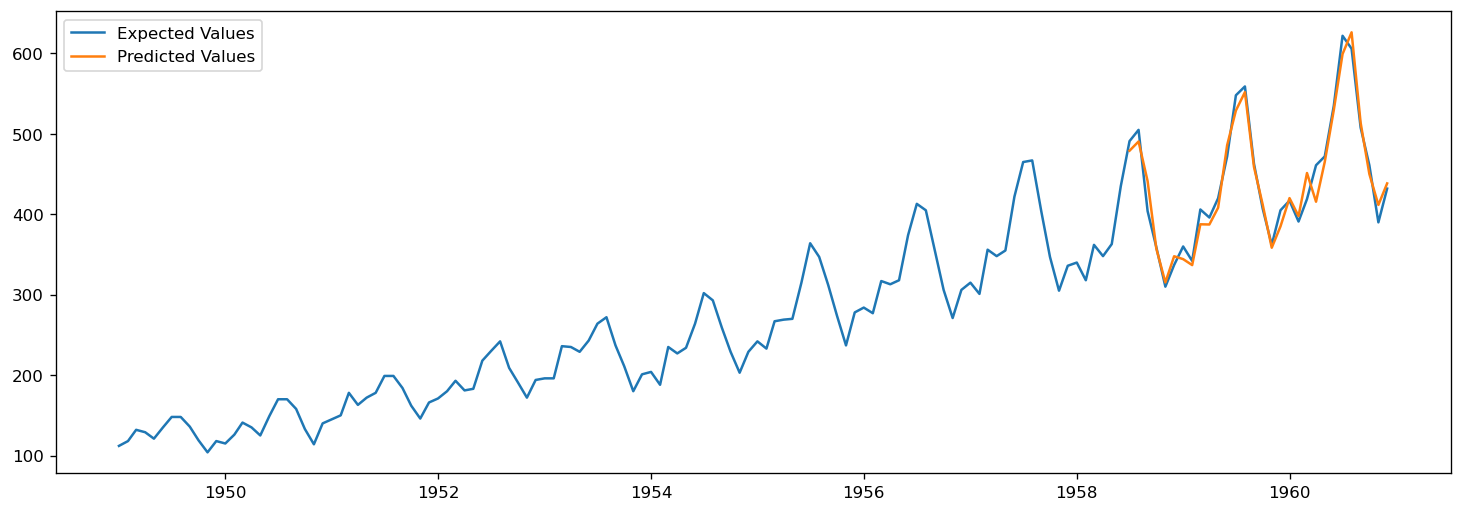

In [62]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data['Passengers'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [63]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 16.9253


# Out of Sample Forecasting

In [64]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(data["Passengers"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3,
                         m=12, #12 is the frequncy of the cycle
                         start_P=0,
                         seasonal=True, #set to seasonal
                         d=None,
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

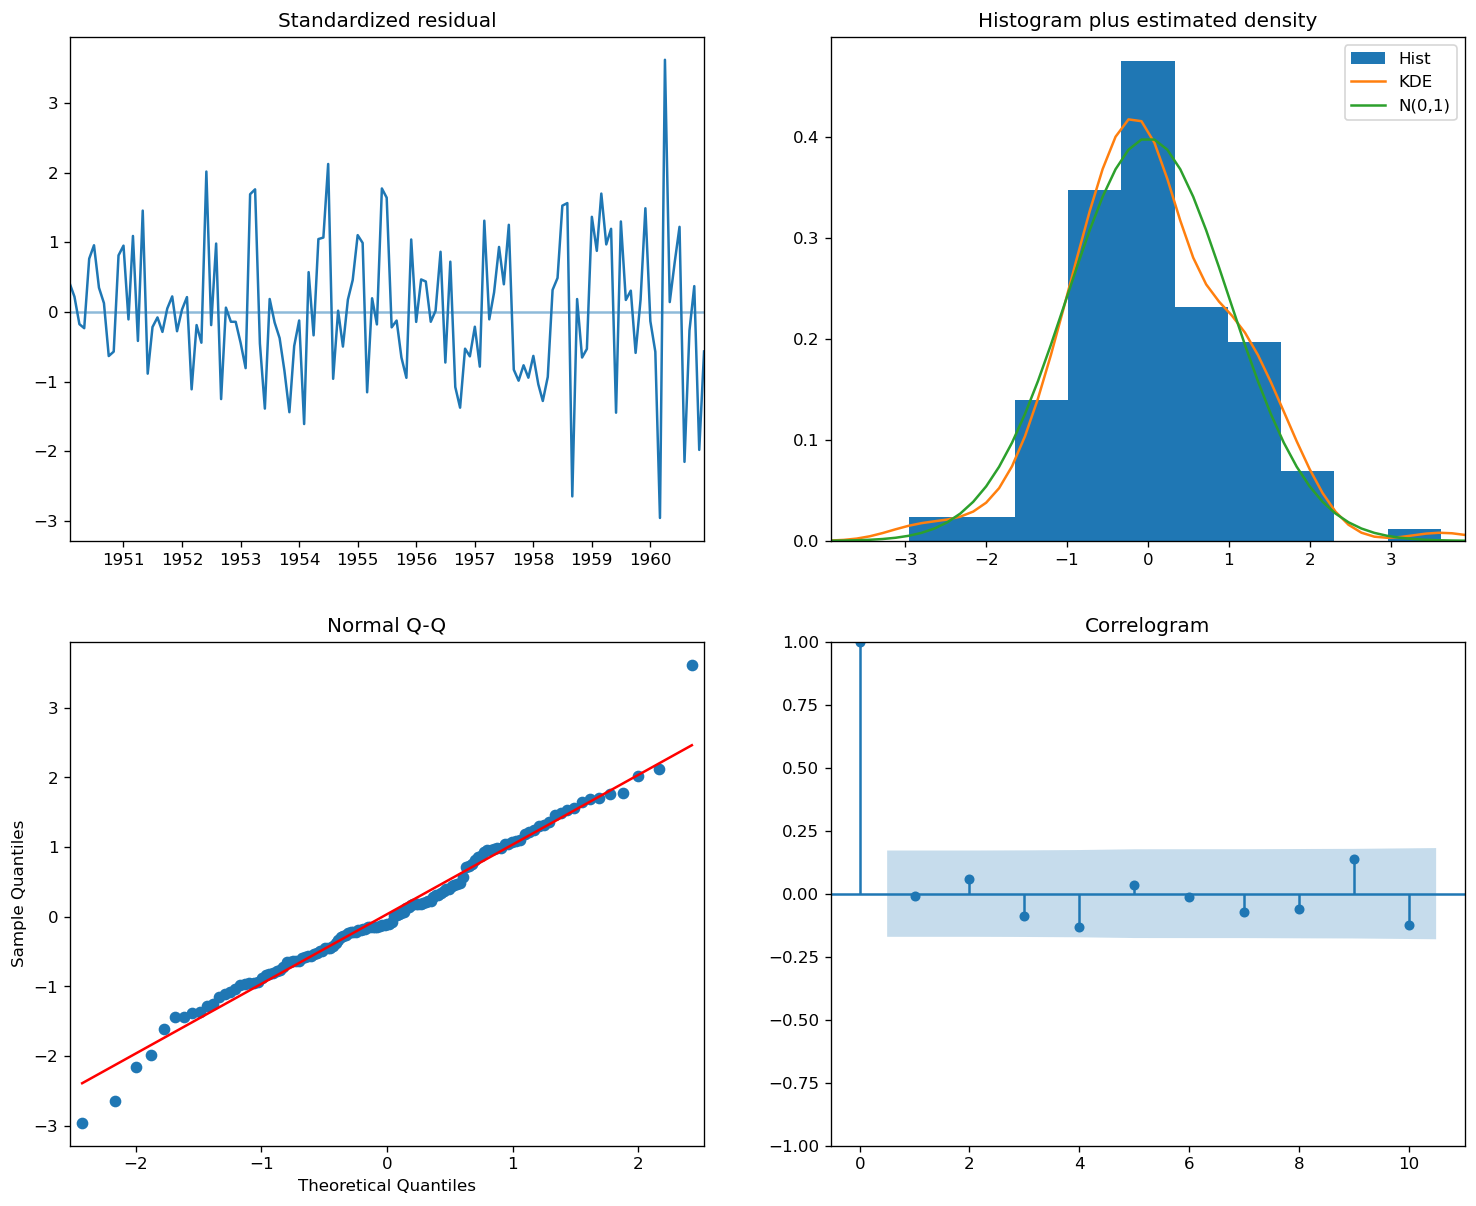

In [65]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

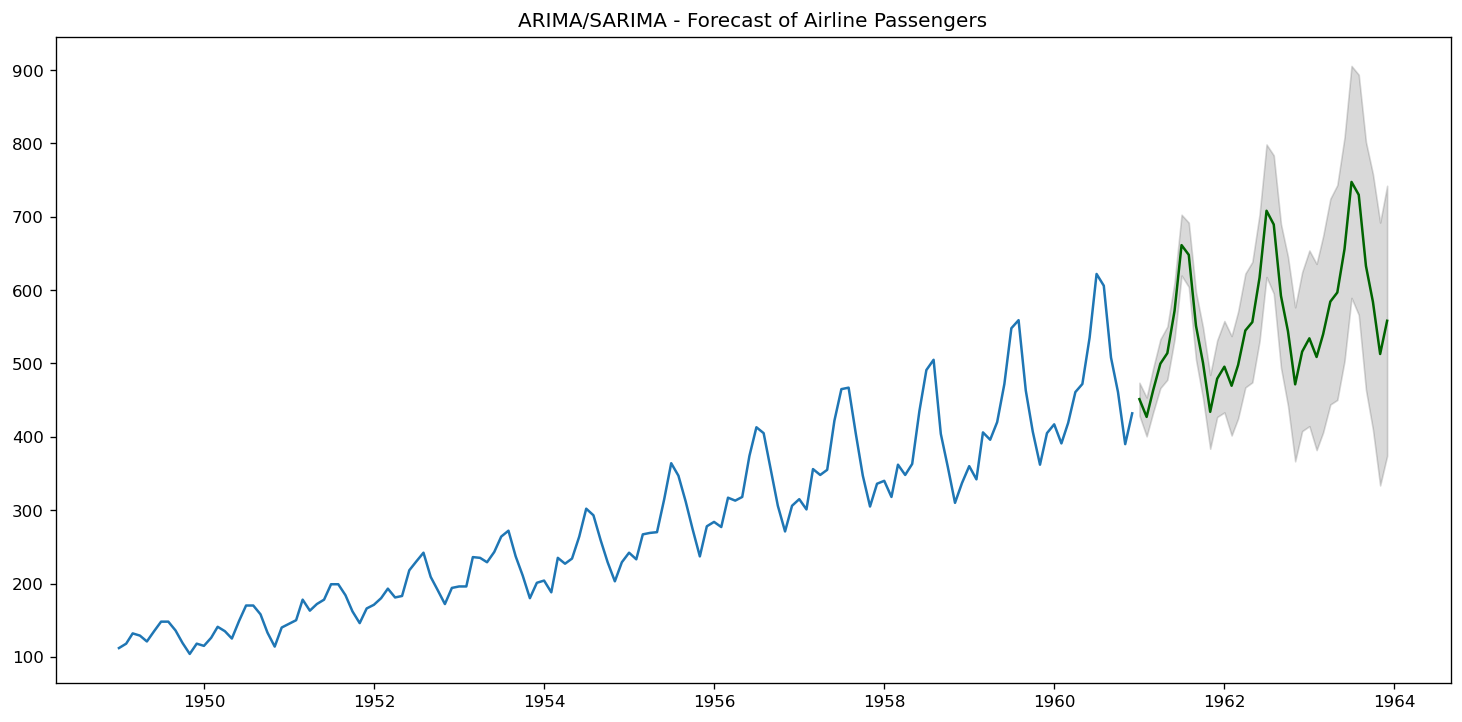

In [66]:
forecast(SARIMA_model)

# **SARIMX MODEL**

In [67]:
#adding exogenous variable
data['Month'] = data.index.month

# SARIMAX Model
SARIMAX_model = pm.auto_arima(data[['Passengers']], exogenous=data[['Month']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

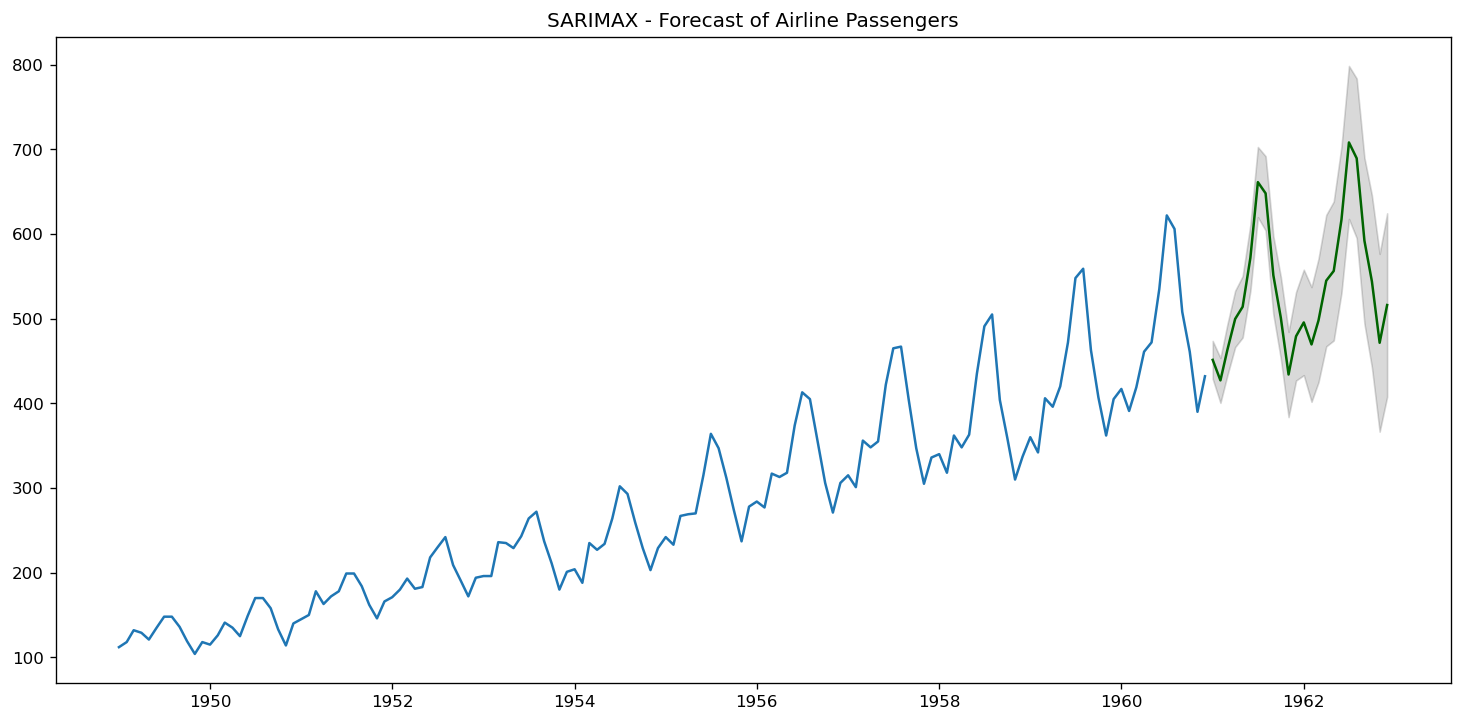

In [68]:
def sarimax_forecast(SARIMAX_model, periods=24):
    # Forecast
    n_periods = periods

    forecast_data = pd.DataFrame({"month_index":pd.date_range(data.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods,
                                            return_conf_int=True,
                                            exogenous=forecast_data[['month_index']])
    index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(data["Passengers"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Airline Passengers")
    plt.show()

sarimax_forecast(SARIMAX_model, periods=24)

# **PSO**

In [ ]:
!pip install pyswarm --quiet
import numpy as np
import pmdarima as pm
from pyswarm import pso
import pandas as pd
import matplotlib.pyplot as plt


  Preparing metadata (setup.py) ... done


In [ ]:
def arima_obj(params, data):
    p, d, q = params
    try:
        model = pm.ARIMA(order=(p, d, q))
        model.fit(data)
        return model.aic()
    except:
        return np.inf


In [ ]:
# arima_obj((2, 1, 2), data)

In [ ]:
lb = [1, 0, 1]  # Lower bounds for p, d, q
ub = [3, 2, 3]  # Upper bounds for p, d, q
bounds = (lb, ub)


In [ ]:
def optimize_arima(data):
    # Define the objective function for PSO
    obj_func = lambda x: arima_obj(x, data)

    # Run PSO optimization
    result = pso(obj_func, lb, ub, swarmsize=10, maxiter=100)

    # Extract the optimized parameters
    p, d, q = result[0]
    print(p)
    print(d)
    print(q)
    return int(p), int(d), int(q)


In [ ]:
optimize_arima(data)

Stopping search: maximum iterations reached --> 100
2.07407770214905
1.5455414057173307
1.9874469408430104


(2, 1, 1)

In [ ]:
def forecast_optimized(data, periods=60):
    # data_values = data.values  # Extract the 'Passengers' column as a 1D array
    p, d, q = optimize_arima(data)
    model = pm.ARIMA(order=(p, d, q))
    model.fit(data)
    n_periods = periods
    fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    last_date = data.index[-1]
    index_of_fc = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    plt.figure(figsize=(15, 7))
    plt.plot(data, color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title("ARIMA/SARIMA - Optimized Forecast of Airline Passengers")
    plt.show()

Stopping search: maximum iterations reached --> 100
2.083554480366175
1.6957244138127638
2.1214594861059393


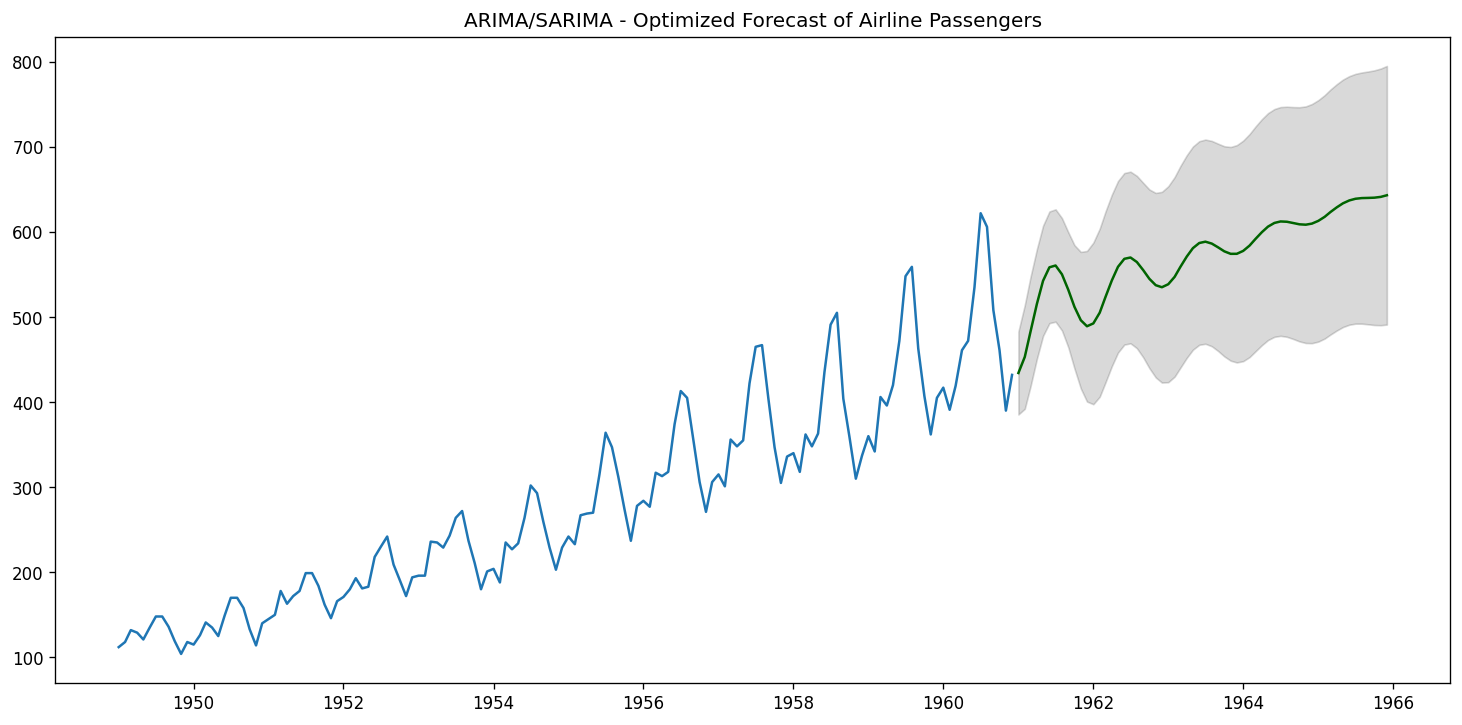

In [ ]:
forecast_optimized(data)